In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs


# MAKE AND READ DATA

In [2]:
X,Y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 2.22991645,  4.40569111],
       [ 1.69259433,  6.06503978],
       [ 9.69354513, -5.21498902],
       ...,
       [ 9.73147176, -5.95441436],
       [ 2.43191919,  5.05140639],
       [ 3.44469371,  6.39208647]])

In [4]:
Y

array([0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1,
       1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1,
       0, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,
       2, 1, 0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2,
       0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 0,
       1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1,
       2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 2,
       2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0,
       2, 2, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2,
       1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1,
       2, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0,

# PLOT IT

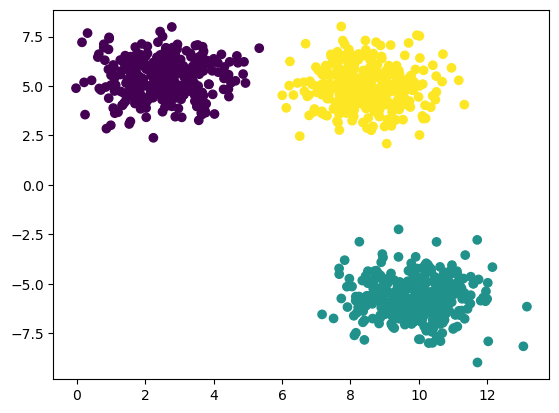

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)

# TRAIN TEST SPLIT

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=40)


# STANDARDIZATION

In [8]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# ELBOW METHOD TO SELECT K VALUE

In [12]:
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")

wcss=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[1399.999999999999,
 588.4089430388726,
 83.93139007179578,
 71.24031796116712,
 58.00538095042872,
 56.40772148757902,
 52.54556559111099,
 38.96927509845117,
 35.494960702285006,
 32.16033275883313]

# PLOT ELBOW CURVE

Text(0, 0.5, 'WCSS')

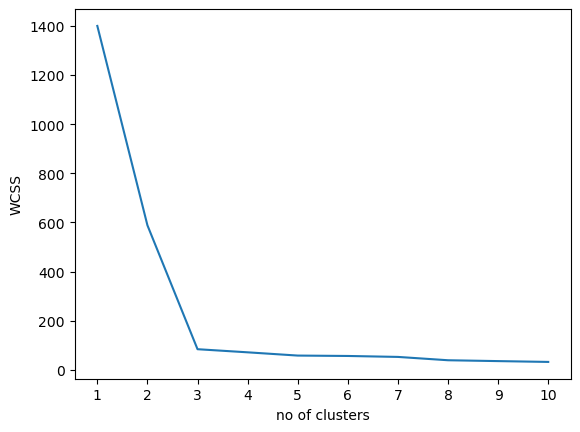

In [14]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("no of clusters")
plt.ylabel("WCSS")

In [16]:
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit_predict(x_train_scaled)

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 0,
       1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 0,
       2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1,
       0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1,
       0, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 0,
       2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1,
       1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2,
       1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1,

In [17]:
y_pred=kmeans.predict(x_test_scaled)

In [18]:
y_pred

array([2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 1,
       0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0,
       0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2,
       0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1,
       0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1,
       1, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1,
       2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0,
       1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 2, 1, 1, 1], d

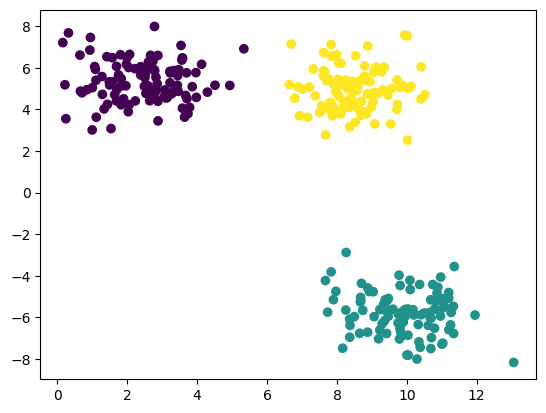

In [19]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

# ANOTHER METHOD TO KNOW K VALUE KNOWN AS KNEELOCATOR

In [20]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [22]:
from kneed import KneeLocator

kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [23]:
kl.elbow

np.int64(3)